**Librairies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress as reg_lin
from sklearn import decomposition
from sklearn import preprocessing
import seaborn as sns
from functionsO import *

**Lecture du fichier nettoyé**

In [2]:
df = pd.read_pickle('df_cleaned.pickle')
print('Dimension du dataset nettoyé:')
print('Lignes: {}'.format(df.shape[0]) + ' \nColonnes: {}'.format(df.shape[1]))

Dimension du dataset nettoyé:
Lignes: 38368 
Colonnes: 15


In [3]:
df.head(2)

,product_name,brands,additives_n,pnns_groups_1,pnns_groups_2,main_category_fr,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition_score,energy_kcal
182,lentilles vertes,Bertrand lejeune,0.0,Céréales et Patates,Légumineuses,Aliments et boissons à base de végétaux,2.0,0.4,54.00,1.8,12.0,0.05,0.019685,-5.0,282.0
184,Biscuits sablés fourrage au cacao,St michel,3.0,Snacks sucrés,Biscuits et gâteaux,Sablés,23.0,13.0,63.05,25.5,6.4,0.54,0.212598,20.5,484.8


# Analyse univariée

## Variables quantitatives

**Statistique descriptive**

In [4]:
#dataframe pour les variables numériques
df_X = df.select_dtypes(include=['float'])

In [5]:
df_X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
additives_n,38368.0,1.723441,2.553652,0.0,0.000000,1.00000,3.000000,31.000000
fat_100g,38368.0,12.441376,16.752269,0.0,0.500000,5.30000,20.500000,100.000000
saturated-fat_100g,38368.0,4.895808,7.591606,0.0,0.100000,1.50000,6.975000,68.000000
carbohydrates_100g,38368.0,25.122555,26.682951,0.0,3.000000,12.00000,51.000000,100.000000
sugars_100g,38368.0,11.509271,17.060356,0.0,0.900000,3.60000,14.000000,100.000000
proteins_100g,38368.0,7.413885,7.227267,0.0,1.200000,6.00000,10.800000,40.000000
salt_100g,38368.0,0.797112,1.055382,0.0,0.030000,0.53086,1.200000,22.100000
sodium_100g,38368.0,0.313819,0.415508,0.0,0.011811,0.20900,0.472441,8.700787
nutrition_score,38368.0,7.948616,8.851071,-15.0,1.000000,9.00000,14.000000,32.000000
energy_kcal,38368.0,242.118142,187.313223,0.0,78.800000,212.20000,373.125000,900.000000


**Affichage des histogrammes des variables numériques**

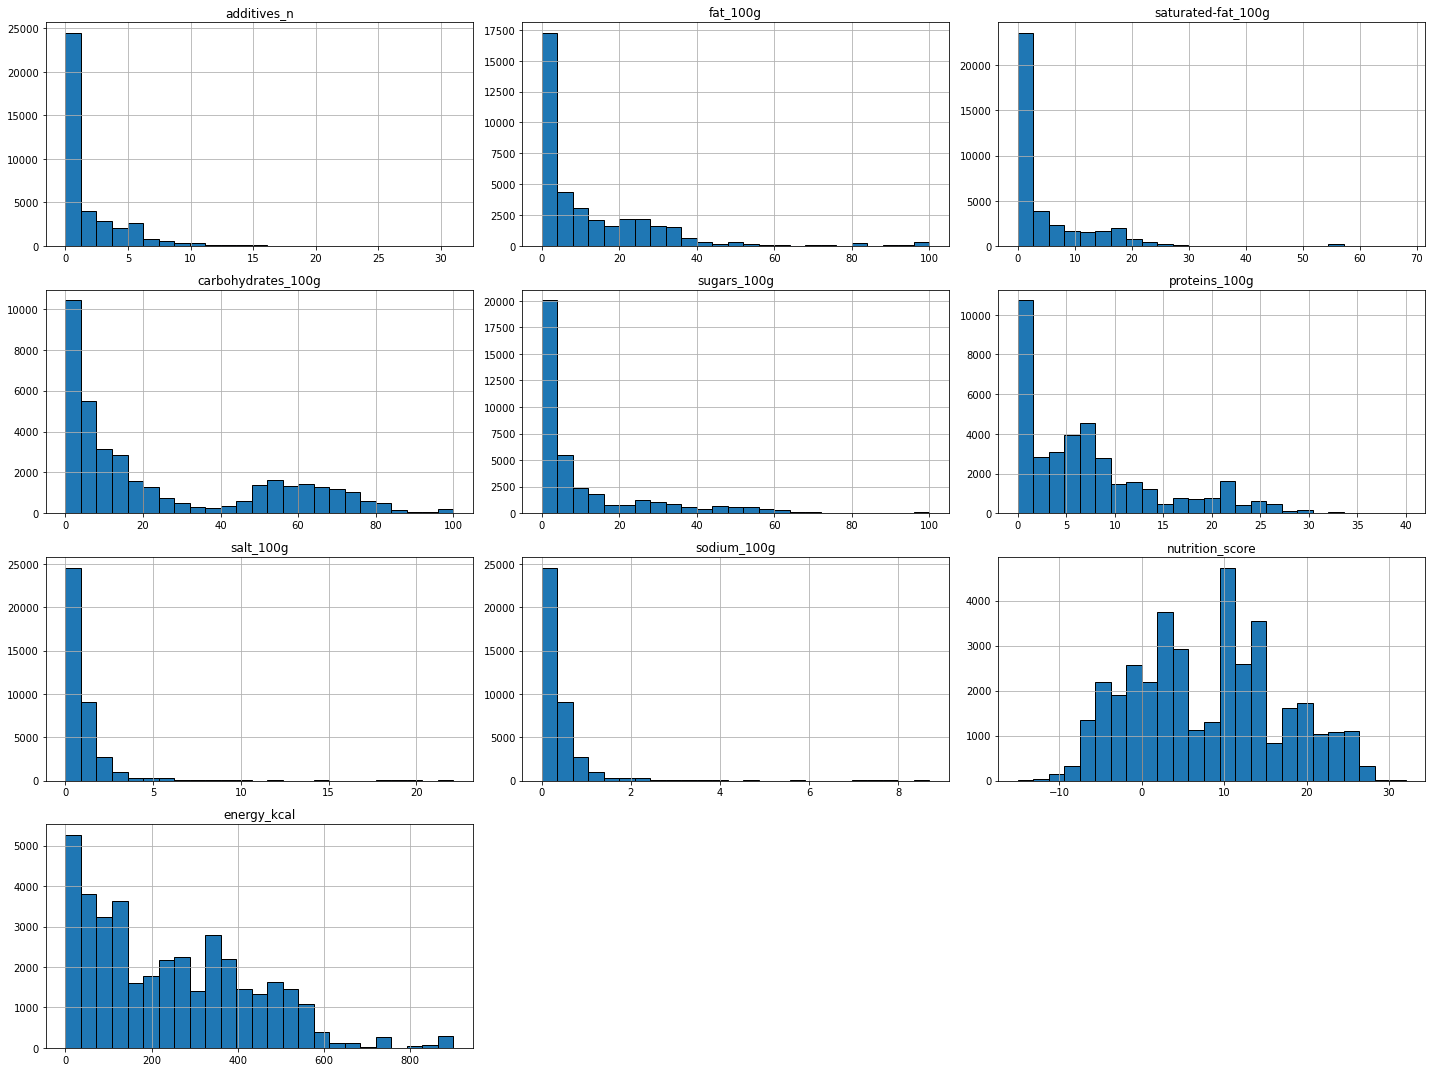

In [6]:
df_X.hist(bins=25, figsize=(20, 15), layout=(-1, 3), edgecolor="black")
plt.xscale("log")
plt.tight_layout()

In [7]:
df_sodium = df_X[df_X.sodium_100g != 0]

In [8]:
df_salt = df_X[df_X.salt_100g != 0]

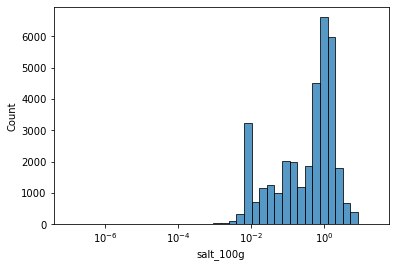

In [9]:
sns.histplot(data=df_salt, x="salt_100g", log_scale=True, bins = 40)
plt.show()

pic d'imputation => arrondi

**Affichage des boxplots**

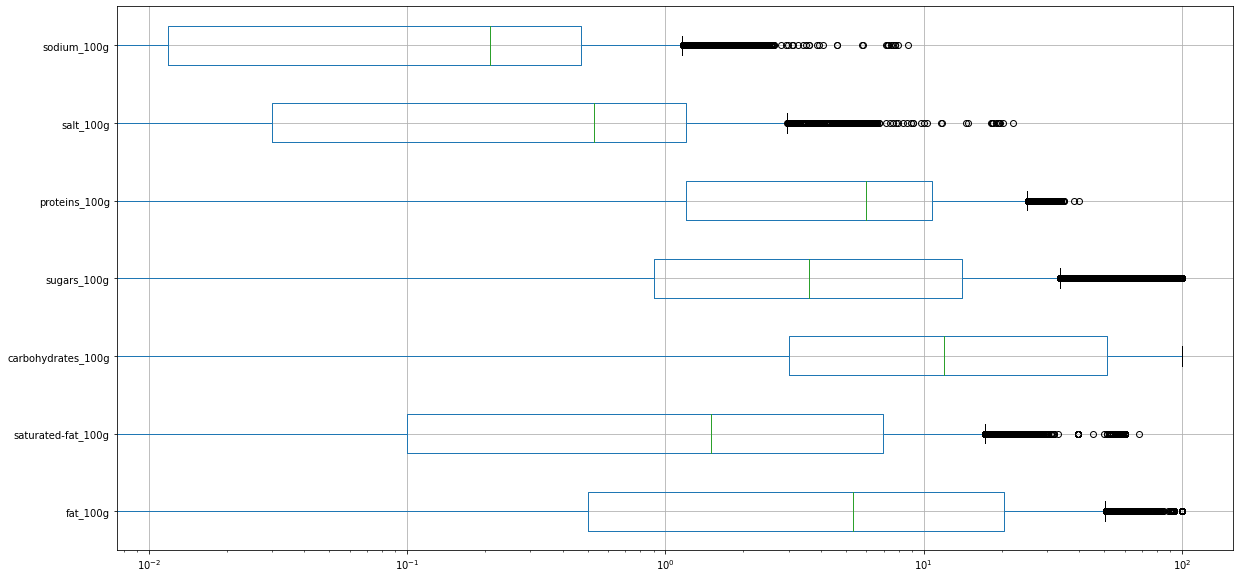

In [10]:
df_X.drop(['energy_kcal','nutrition_score','additives_n'], axis=1).boxplot(figsize=(20,10),vert=False)
plt.xscale("log")
plt.show()

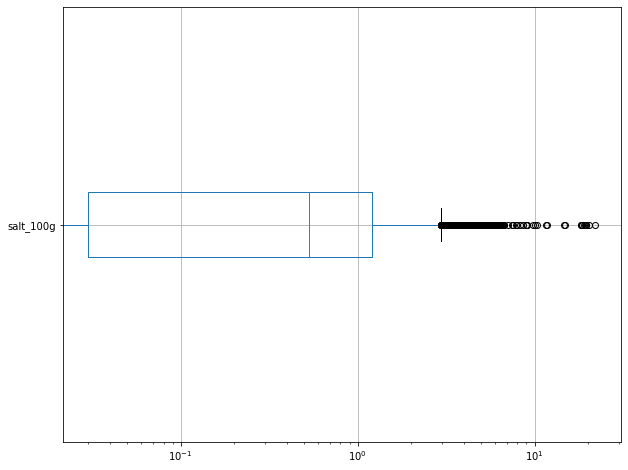

In [11]:
ax = df_X.boxplot(column=['salt_100g'],figsize=(10,8),vert=False) 
ax.set_xscale('log')
plt.show()

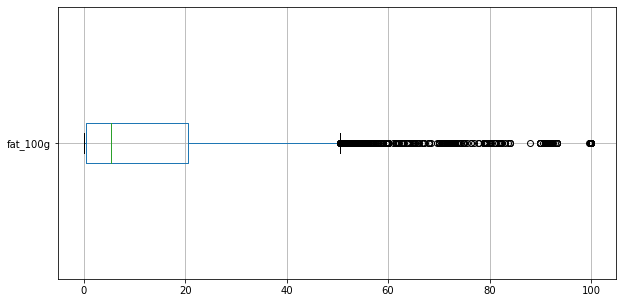

In [12]:
df_X.boxplot(column=['fat_100g'],figsize=(10,5),vert=False) 
plt.show()

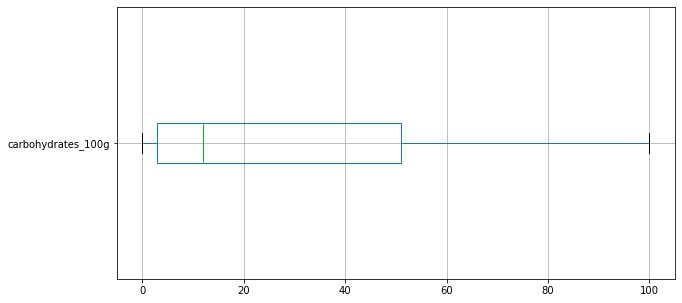

In [13]:
df_X.boxplot(column=['carbohydrates_100g'],figsize=(10,5),vert=False) 
plt.show()

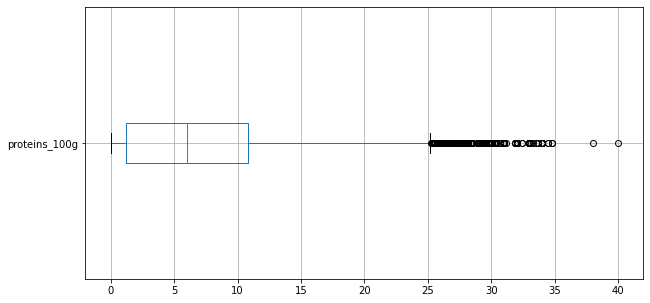

In [14]:
df_X.boxplot(column=['proteins_100g'],figsize=(10,5),vert=False) 
plt.show()

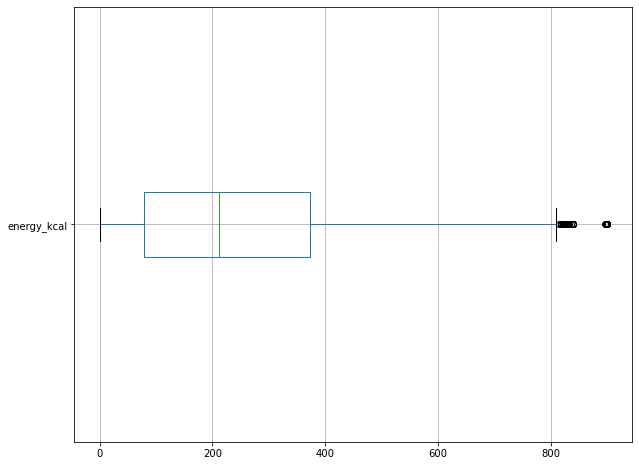

In [15]:
df_X.boxplot(column=['energy_kcal'],figsize=(10,8),vert=False) 
plt.show()

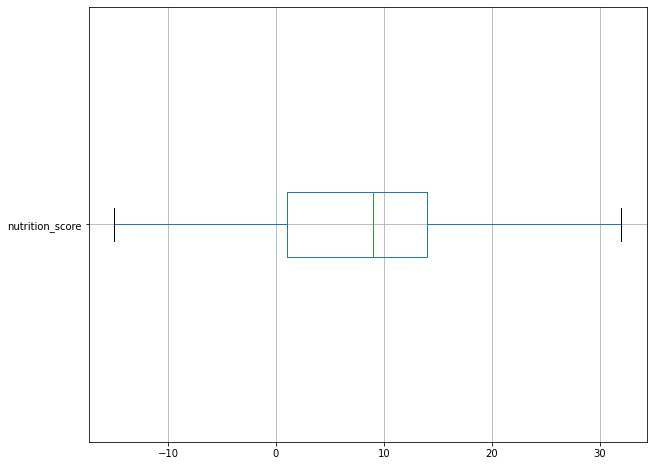

In [16]:
df_X.boxplot(column=['nutrition_score'],figsize=(10,8),vert=False) 
plt.show()

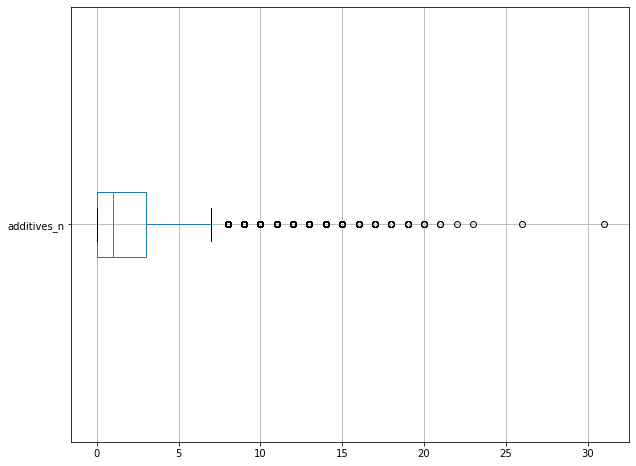

In [17]:
df_X.boxplot(column=['additives_n'],figsize=(10,8),vert=False)
plt.show()

## Variables qualitatives

In [18]:
df.describe(exclude="number").transpose()

,count,unique,top,freq
product_name,38368,33033,Moutarde de Dijon,30
brands,38368,7794,Carrefour,2150
pnns_groups_1,38368,9,Snacks sucrés,7242
pnns_groups_2,38368,35,Plats préparés,3679
main_category_fr,38368,165,Boissons,2580


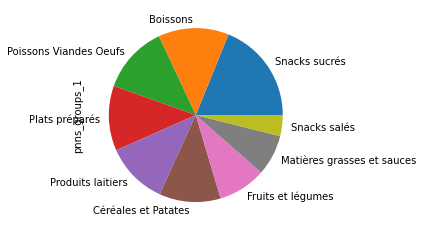

In [19]:
df['pnns_groups_1'].value_counts().sort_values(ascending=False).plot.pie()
plt.show()

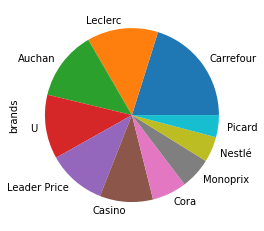

In [20]:
df['brands'].value_counts().sort_values(ascending=False).iloc[:10].plot.pie()
plt.show()

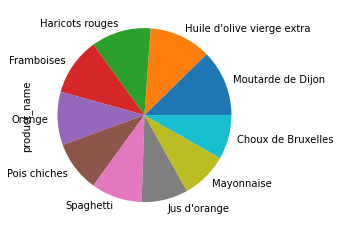

In [21]:
df['product_name'].value_counts().sort_values(ascending=False).iloc[:10].plot.pie()
plt.show()

# Analyse multivariée

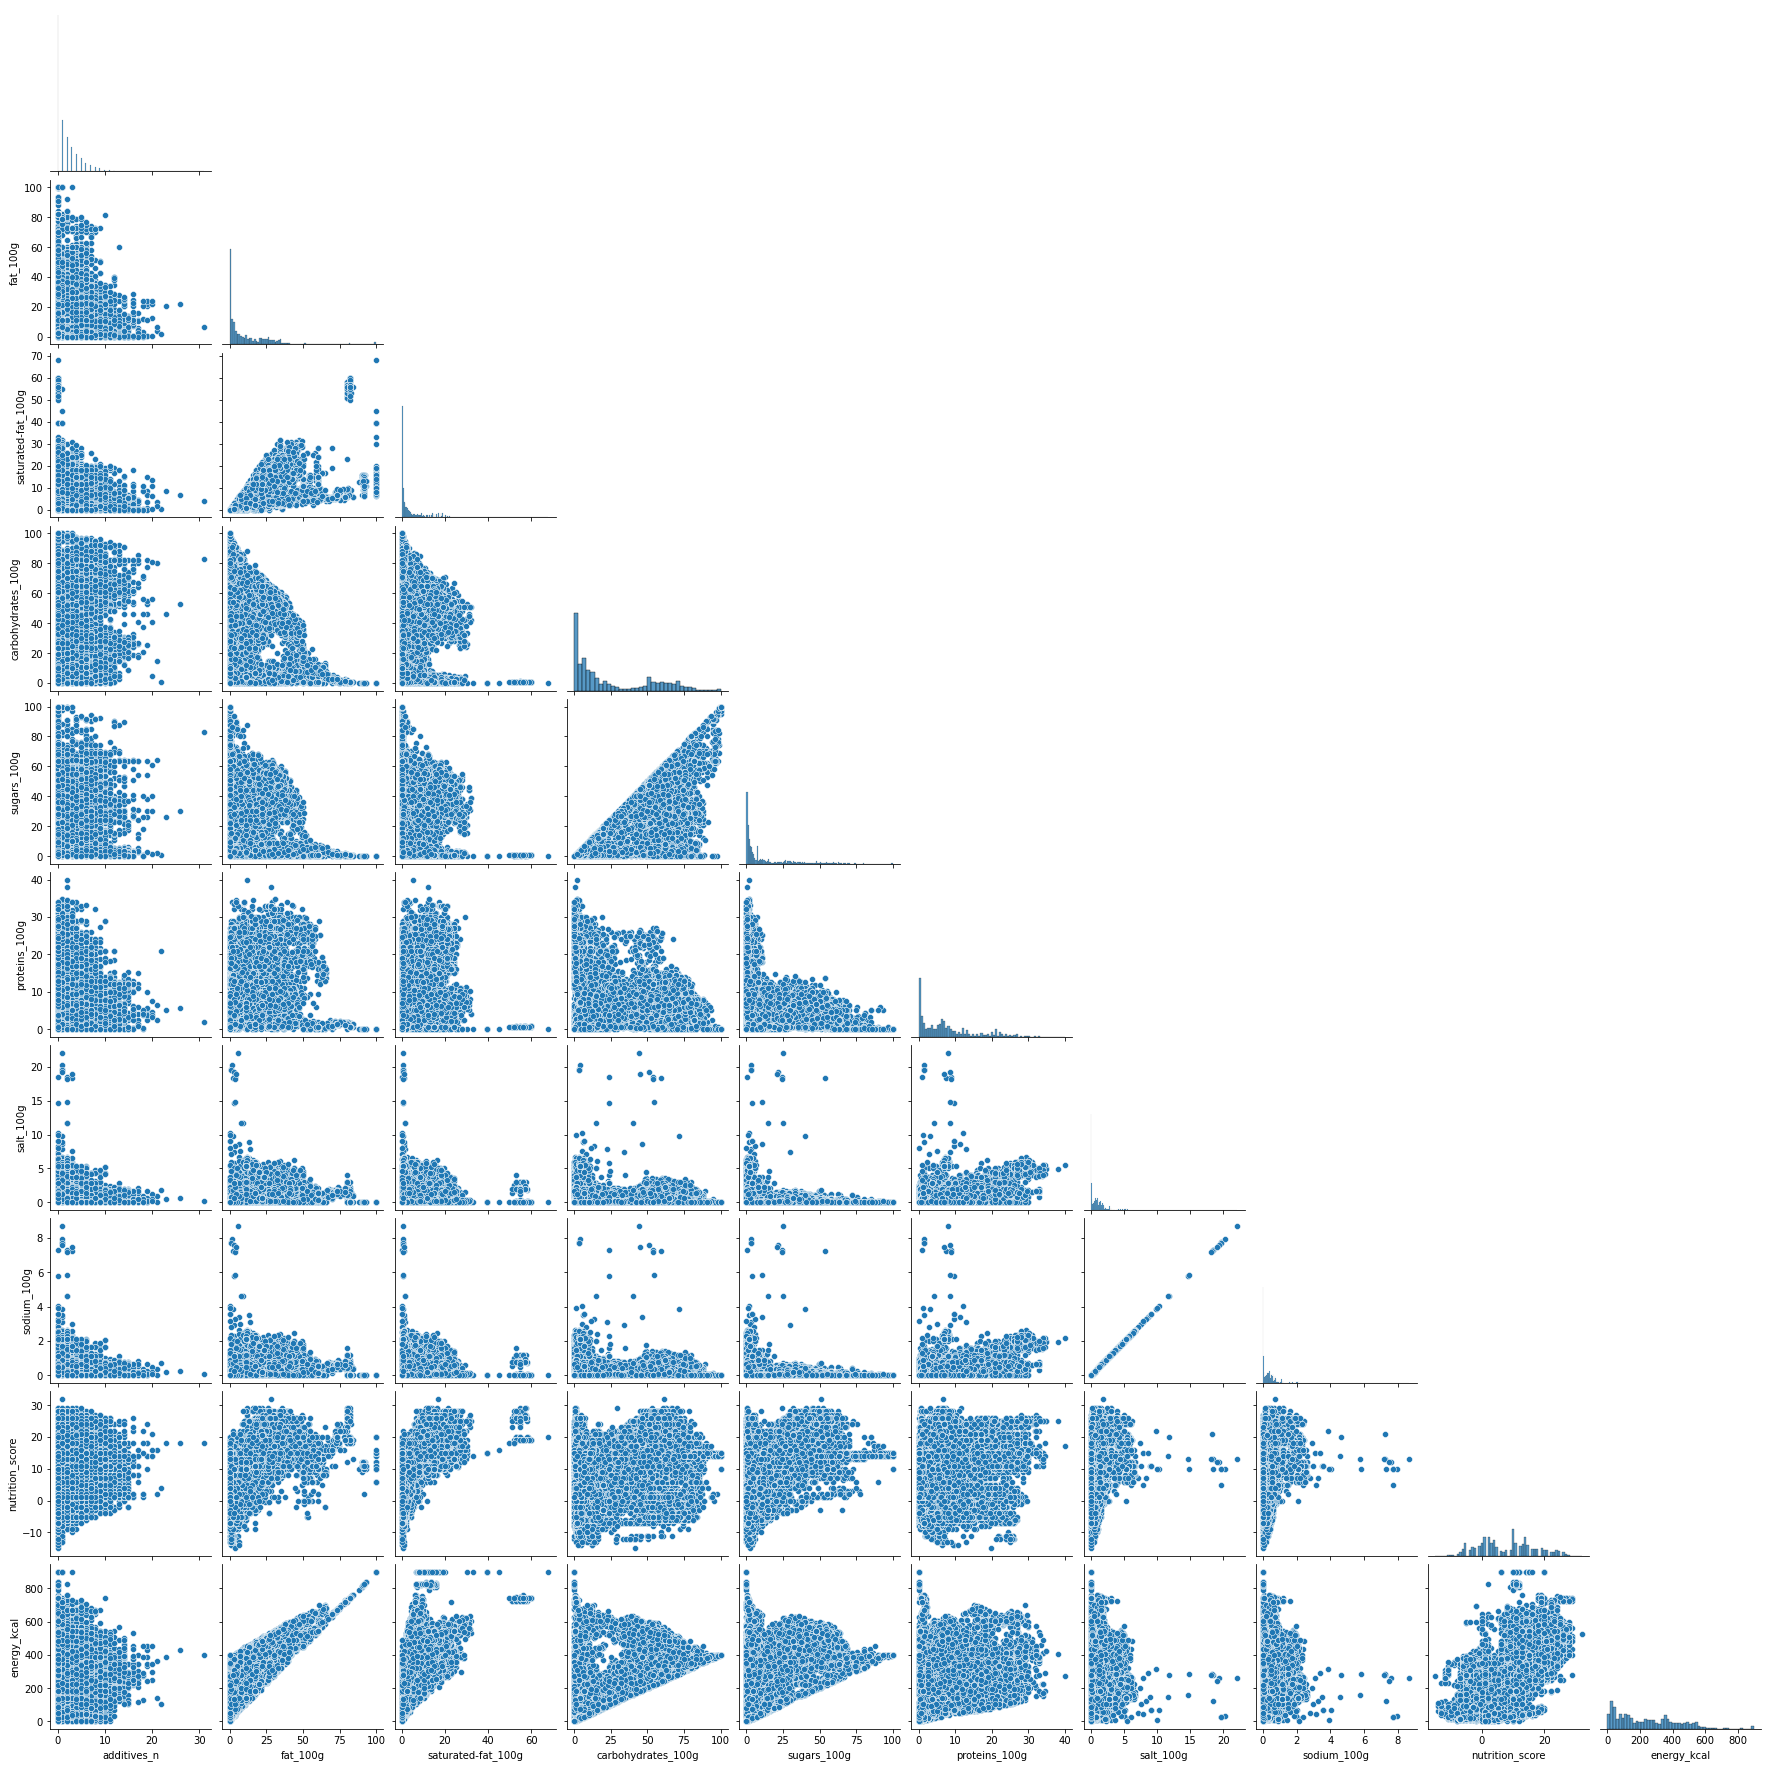

In [22]:
sns.pairplot(df_X, corner=True)

**Comparaison nutriscore/energy_kcal et additifs par catégories**

RAPPEL : Le nutriscore est une valeur sans unité et va de **-15** (qualité nutritionnelle élevée) à **40** (faible qualité nutritionnelle)

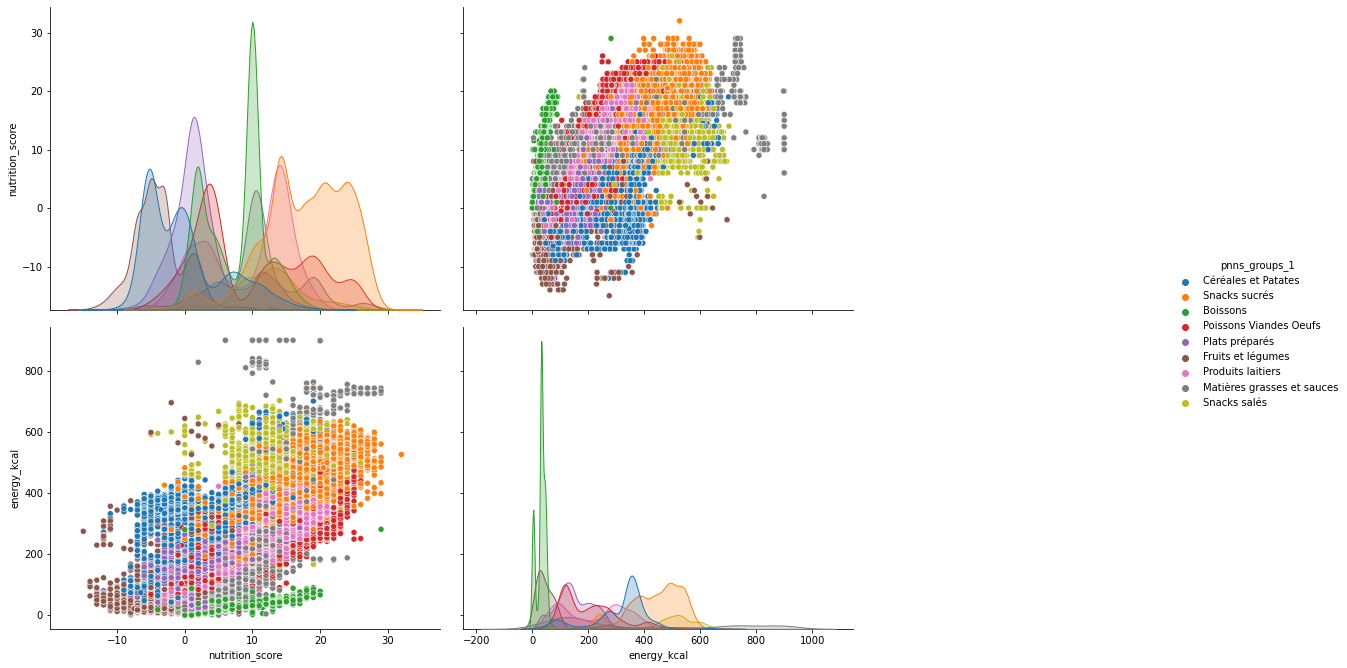

In [23]:
g = sns.pairplot(df, vars = ["nutrition_score","energy_kcal"], hue = 'pnns_groups_1')
g.fig.set_size_inches(20,10)

- On observe que les aliments de la même catégorie sont regroupés entre eux.
- On peut séparer des catégories de produits selons le nutriscore assez facilement : plats préparés, et snacks scurés par exemple
- Les fruits et légumes possèdent un nutriscore plus faible que les snacks sucrés. 
- Les produits les plus caloriques ont tendance à avoir un nutrition_score plus elevé (mauvais pour la santé)
- Ex : les plats préparés d'après ce graphique ont tendance à avoir un bon/rapport : nutrition_score/énergy (peu calorique et bon nutriscore) ce qui pourrait indiquer que ces produits sont généralement bon. Cependant le nutriscore ne prend pas en compte le nombre d'additifs, dont certains peuvent être néfastes. Vérifions cela.

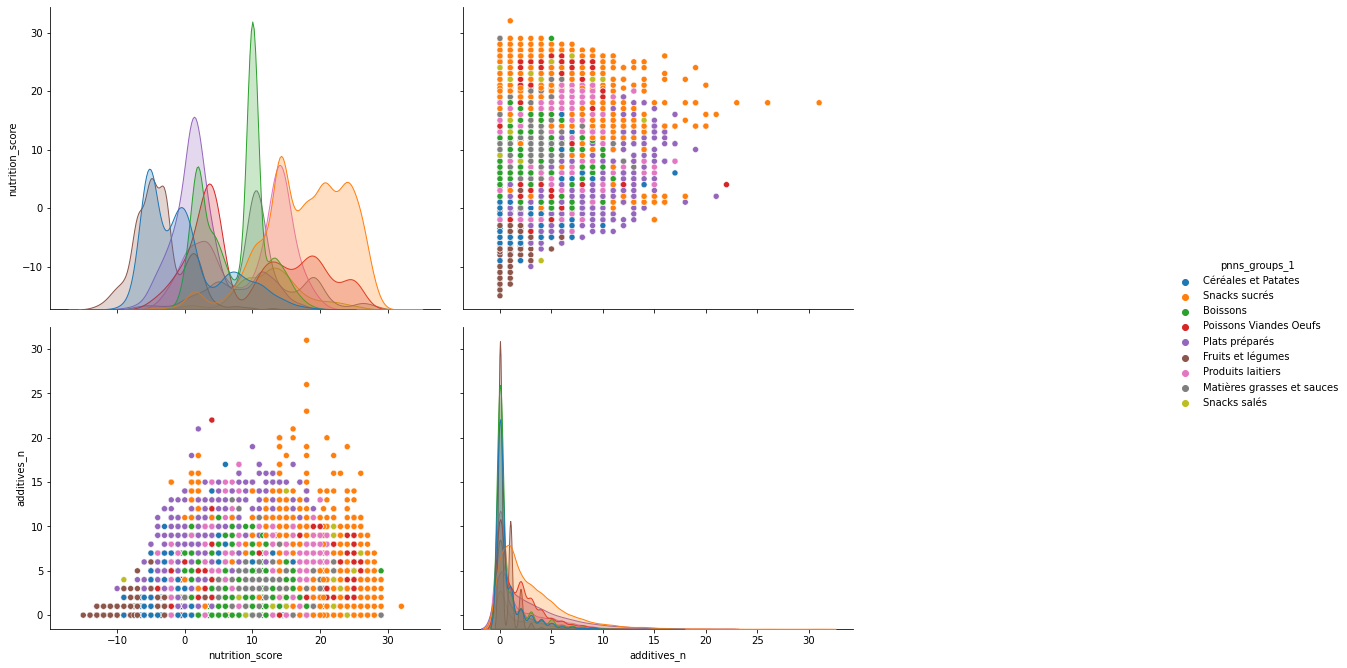

In [24]:
g = sns.pairplot(df, vars = ["nutrition_score","additives_n"], hue = 'pnns_groups_1')
g.fig.set_size_inches(20,10)

- Les produits avec le plus d'additifs ont tendance à être les plats préparés et les snack sucrés. 
- Les produits avec le moins d'additifs ont tendance à être les fruits et légumes

Méfiance quant aux plats préparés donc.

**Peut-on admettre que les légumes sont meilleurs que les chocolats pour la santé, comparaison de deux produits : chocolats et légumes**

In [25]:
df["pnns_groups_2"].value_counts(dropna=False).sort_values(ascending=False).iloc[0:10]

Plats préparés          3679
Biscuits et gâteaux     3257
Charcuteries            2239
Fromage                 2210
Céréales                2035
Confiserie              1979
Légumes                 1771
Chocolats               1630
Boissons non sucrées    1592
Condiments et sauces    1587
Name: pnns_groups_2, dtype: int64

In [26]:
distrib_s = df["nutrition_score"][df["pnns_groups_2"]=="Légumes"]
distrib_l = df["nutrition_score"][df["pnns_groups_2"]=="Chocolats"]
label1 = "Légumes"
label2 = "Chocolats"
label3= 'moyenne légumes'
label4= 'moyenne chocolats'
var1 = distrib_s.var()
var2 = distrib_l.var()

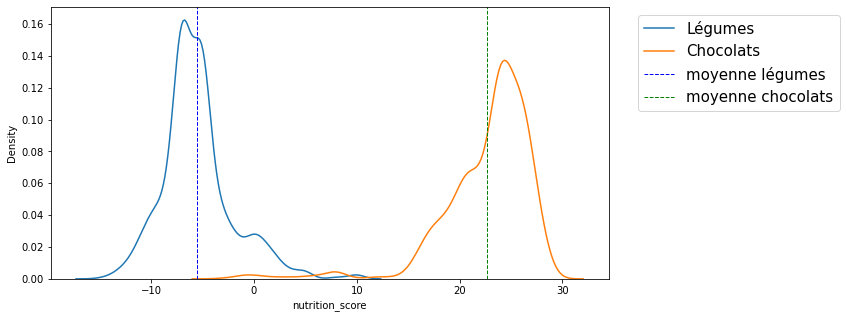

In [27]:
# Représentation graphique
fig, axs = plt.subplots(figsize=(10,5))
sns.kdeplot(distrib_s)
sns.kdeplot(distrib_l)
axs.axvline(distrib_s.mean(), color="b", ls="--", linewidth=1)
axs.axvline(distrib_l.mean(), color="g", ls="--", linewidth=1)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", labels=[label1, label2, label3, label4], fontsize=15)
plt.show()

La distribution des deux courbes est différentes et permet de distinguer les deux produits. En moyenne les légumes sont meilleurs pour la santé car ils possèdent un nutriscore plus faible que les chocolats.

**Matrice de correlation**

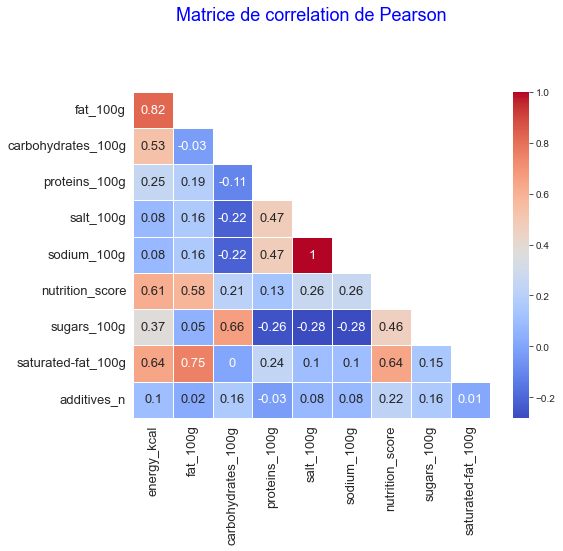

In [28]:
macros = ["energy_kcal","fat_100g", "carbohydrates_100g", "proteins_100g", "salt_100g", "sodium_100g","nutrition_score","sugars_100g","saturated-fat_100g","additives_n"]


# Pour masquer le triangle du haut et éviter les redondances d'information
corr_matrix = df.corr().round(2)
corr_pearson = corr_matrix[macros].loc[macros]
mask = np.zeros_like(corr_pearson)
mask[np.triu_indices_from(mask)] = True

# Pour supprimer les cellules vides du haut et du bas
mask = mask[1:, :-1]
corr = corr_pearson.iloc[1:, :-1]

with sns.axes_style("white"):
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, mask=mask, annot=True, annot_kws={"size": 13}, square=False, 
                linewidths=0.5, cmap="coolwarm")
    plt.tick_params(labelsize=13)
    plt.title("Matrice de correlation de Pearson", fontsize=18, color="b", x=0.5, y=1.2)
    plt.show()

- Correlation évidente pour le sel et le sodium, on pourrait 'fusionner' les deux colonnes entre elles.
- Correlation évidente également entre les macronutriment enfant/parent, satured_fat/fat et sugars/carbs
- Correlation positive importante entre le nutrition_score et la variable fat, si fat augmente, score_nutrition augmente 
- Légère correlation négative entre le taux de sucre et le taux de sel/proteines. En général, plus le produit est sucré, moins il contient de sel/protéines et inversement.

Comme on à pu le voir avec notre exemple des plats préparés. le nutrition_score est peu corrélé avec un produit riche en additifs. Certains pourtant néfaste pour la santé. 

# Analyse en Composantes Principales

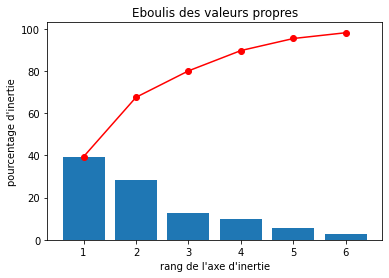

In [29]:
# selection des colonnes à prendre en compte dans l'ACP
data_pca = df[['energy_kcal', 'sugars_100g', 'saturated-fat_100g','carbohydrates_100g', 'salt_100g', 'proteins_100g', 'nutrition_score']]

# choix du nombre de composantes pricipales à calculer
n_comp = 6

# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean())  # remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

Interprétation de l'éboulis :

On sélectionne 2 composantes car l'inertie est > 50 % dans ce cas

**Cercles des corrélations**

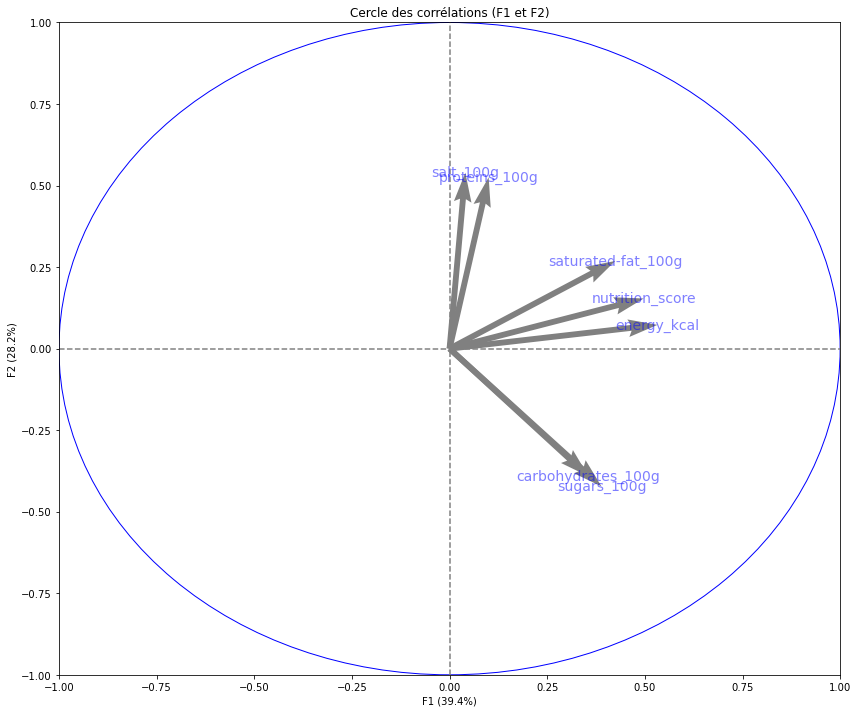

In [30]:
# Cercle des corrélations : premier plan factoriel
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

- Variables les plus corrélées à **F1** : `proteins`,`sel`,`sodium`,`sugars`,`carbohydrates`. Cet axe est lié au sucré/salé
- Variables les plus corrélées à **F2** :  `saturated-fat`, ,`fat`,`energy`, `nutriscore`. Cet axe est lié aux variables les plus contributives/relatif à l'aspect énergétique

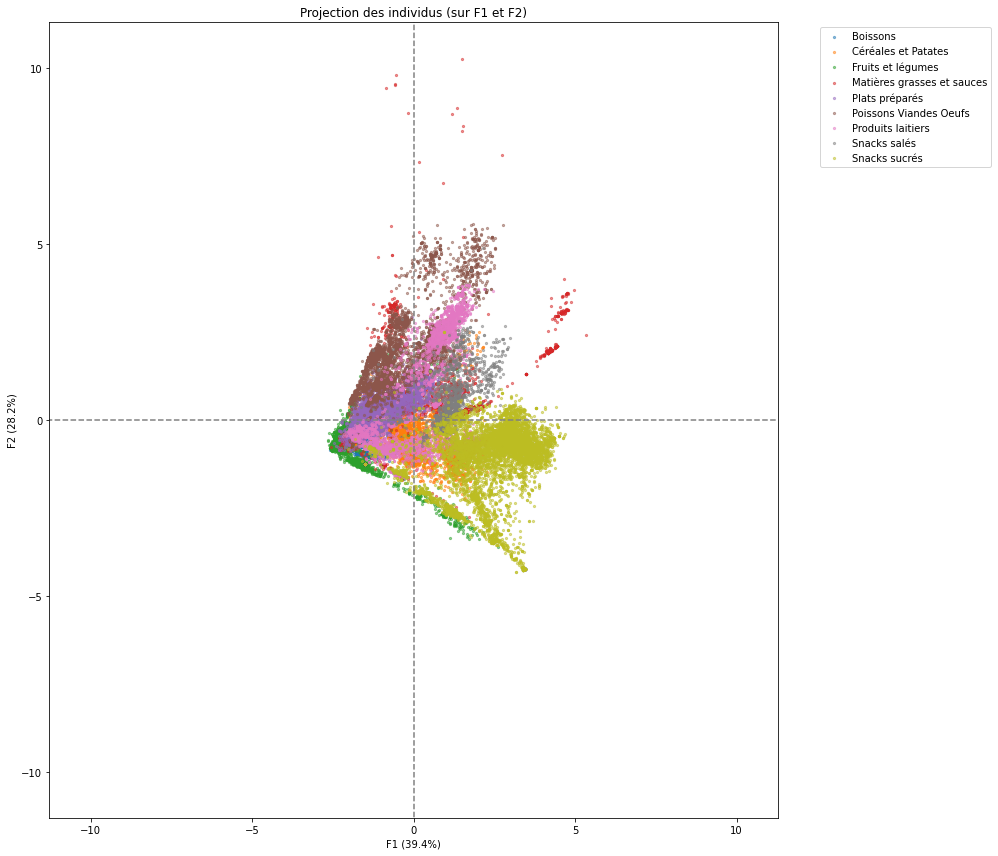

In [31]:
#Projection par des produits par catégories
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0, 1)], illustrative_var = df['pnns_groups_1'], alpha = 0.5)

In [32]:
group = df.groupby('pnns_groups_1').mean().reset_index()

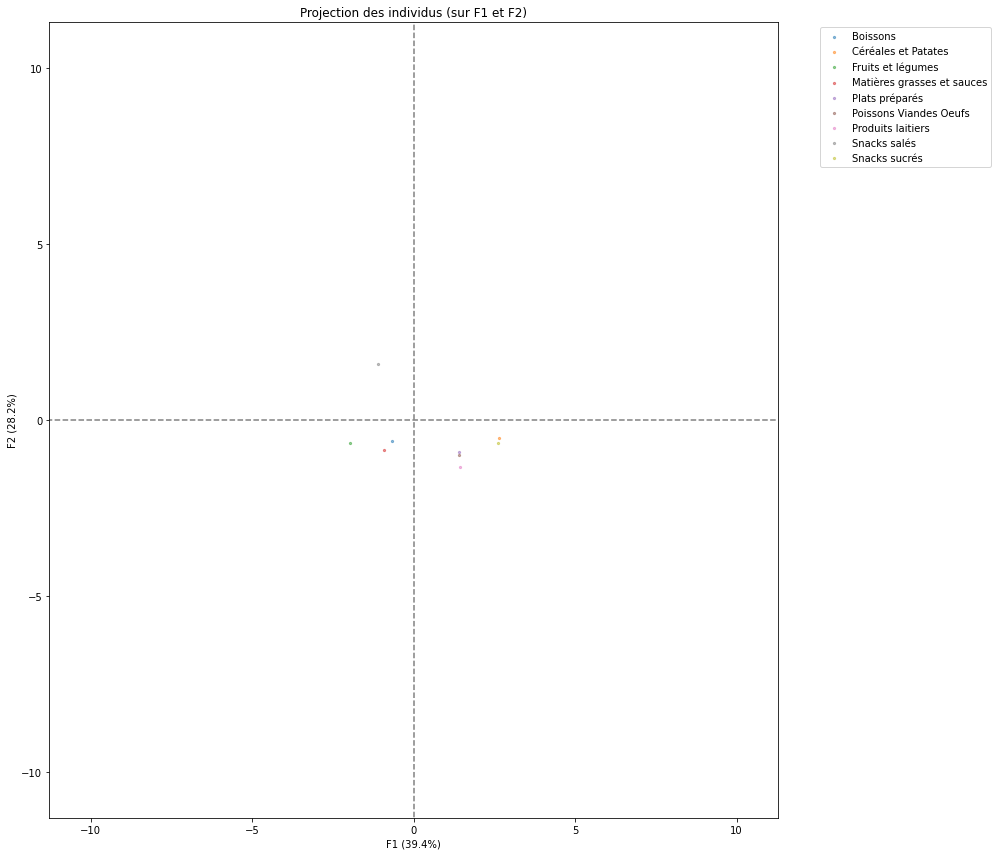

In [33]:
#Projection par valeurs moyenne des produits par catégories
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0, 1)], illustrative_var = group['pnns_groups_1'], alpha = 0.5)

No handles with labels found to put in legend.


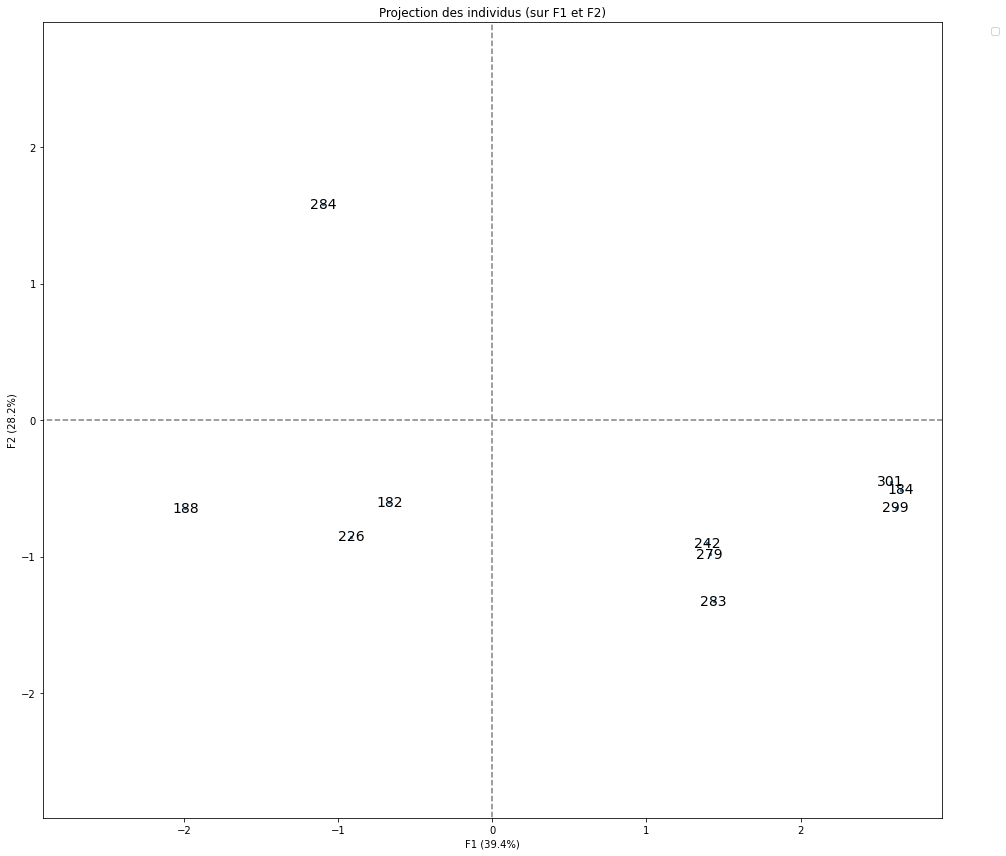

,product_name,brands,additives_n,pnns_groups_1,pnns_groups_2,main_category_fr,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition_score,energy_kcal
182,lentilles vertes,Bertrand lejeune,0.0,Céréales et Patates,Légumineuses,Aliments et boissons à base de végétaux,2.0,0.4,54.00,1.8,12.00,0.0500,0.019685,-5.0,282.0
184,Biscuits sablés fourrage au cacao,St michel,3.0,Snacks sucrés,Biscuits et gâteaux,Sablés,23.0,13.0,63.05,25.5,6.40,0.5400,0.212598,20.5,484.8
188,Thé de Noël aromatisé orange-cannelle,Alice délice,0.0,Boissons,Boissons non sucrées,Thés,0.0,0.0,0.50,0.5,0.50,0.0000,0.000000,2.0,4.0
226,"Pepsi, Nouveau goût !",Pepsi,2.0,Boissons,Boissons sucrées,Sodas,0.0,0.0,10.40,10.4,0.00,0.0254,0.010000,13.0,41.6
242,Madeleines nature,Bijou,5.0,Snacks sucrés,Biscuits et gâteaux,Gâteaux,23.0,2.5,55.00,26.0,6.00,0.6600,0.259843,12.0,451.0
279,Cakes Raisins,Bijou,5.0,Snacks sucrés,Biscuits et gâteaux,Gâteaux,19.0,2.5,56.00,28.0,5.80,0.6500,0.255906,13.0,418.2
283,Cakes aux Fruits,Bijou,11.0,Snacks sucrés,Biscuits et gâteaux,Pâtisseries,15.0,2.0,60.00,34.0,4.90,0.6000,0.236220,12.0,394.6
284,Chair à saucisse,Sovivo,6.0,Poissons Viandes Oeufs,Viandes,Viandes,5.0,1.6,0.70,0.5,20.95,1.1750,0.462598,4.0,131.6
299,Financiers aux Amandes,Bijou,3.0,Snacks sucrés,Biscuits et gâteaux,Pâtisseries,23.0,10.0,51.00,39.0,8.00,0.5500,0.216535,22.0,443.0
301,Fondants Citron,Bijou,8.0,Snacks sucrés,Biscuits et gâteaux,Pâtisseries,24.0,10.0,50.00,37.0,8.10,0.7800,0.307087,22.0,448.4


In [34]:
# Projection des 10 premiers produits de df sur le premier plan factoriel :
data_pca_sample = df[['energy_kcal','sugars_100g', 'saturated-fat_100g', 'carbohydrates_100g','salt_100g', 'proteins_100g', 'nutrition_score']].iloc[0:10]
data_pca_sample = data_pca_sample.fillna(data_pca.mean())  # remplacer les valeurs inconnues par la moyenne de la variable
X_sample = data_pca_sample.values
X_sample_scaled = std_scale.transform(X_sample)
X_sample_projected = pca.transform(X_sample_scaled)
display_factorial_planes(X_sample_projected,
                         n_comp,
                         pca, [(0, 1)],
                         labels=df.iloc[0:10].index)
display(df.iloc[0:10])

Observations et interprétations :
   
- Les points les plus à gauches sont les aliments suivants : Thé de Noël (188), lentilles vertes (182), Pepsi(226) et Chair à saucisse (284)
- Les points les plus à droites sont les aliments suivants : Tous les cakes et biscuits
- Les points les plus hauts : Chair à saucisse
- Les points les plus bas : Cakes

On peut interpréter de la manière suivante : 
- Plus l'aliment est à gauche sur le graphique, moins l'aliment est calorique. Plus il est à droite, plus il est calorique et gras
- Plus l'aliment est en haut, plus l'aliment est salé et/ou riche en protéines. Plus il est en bas plus il est sucré
    

# Application

-----------------------

**Principe :**





**Pour un produit sans nutriscore affiché, ou un produit étranger, on souhaite donner une information
rapide et visuelle de sa qualité nutritionnelle au sein de sa catégorie de produit et ainsi faire une estimation de son nutriscore.**

-----------------------------------

In [35]:
data_pca = pd.DataFrame({'F1': X_projected[:,0],'F2': X_projected[:,1],'catégorie':df['pnns_groups_1'],'nutrition_score':df['nutrition_score'],'marque':df['brands'],'produit':df['product_name']})

In [36]:
data_pca.marque.value_counts().iloc[0:6]

Carrefour       2150
Leclerc         1410
Auchan          1373
U               1273
Leader Price    1159
Casino          1055
Name: marque, dtype: int64

**Je sélectionne seulement les marques les plus fréquentes**

In [37]:
data_pca = data_pca[  (data_pca['marque'] == 'Carrefour') | 
                      (data_pca['marque'] == 'Casino') |  
                      (data_pca['marque'] == 'Leclerc') |
                      (data_pca['marque'] == 'Auchan')| 
                      (data_pca['marque'] == 'U')| 
                      (data_pca['marque'] == 'Leader Price')]

In [38]:
data_pca.head(5)

,F1,F2,catégorie,nutrition_score,marque,produit
15702,1.778087,-0.620524,Snacks sucrés,18.0,Leclerc,Mille feuille
112615,-1.094760,1.579896,Poissons Viandes Oeufs,4.0,Leclerc,viande bovine steak à griller
112657,-1.094760,1.579896,Poissons Viandes Oeufs,4.0,Leclerc,Côte de Porc
112683,-1.094760,1.579896,Poissons Viandes Oeufs,4.0,Leclerc,Escalopes de porc
112684,-1.094760,1.579896,Poissons Viandes Oeufs,4.0,Leclerc,Côtes filet avec os x 1


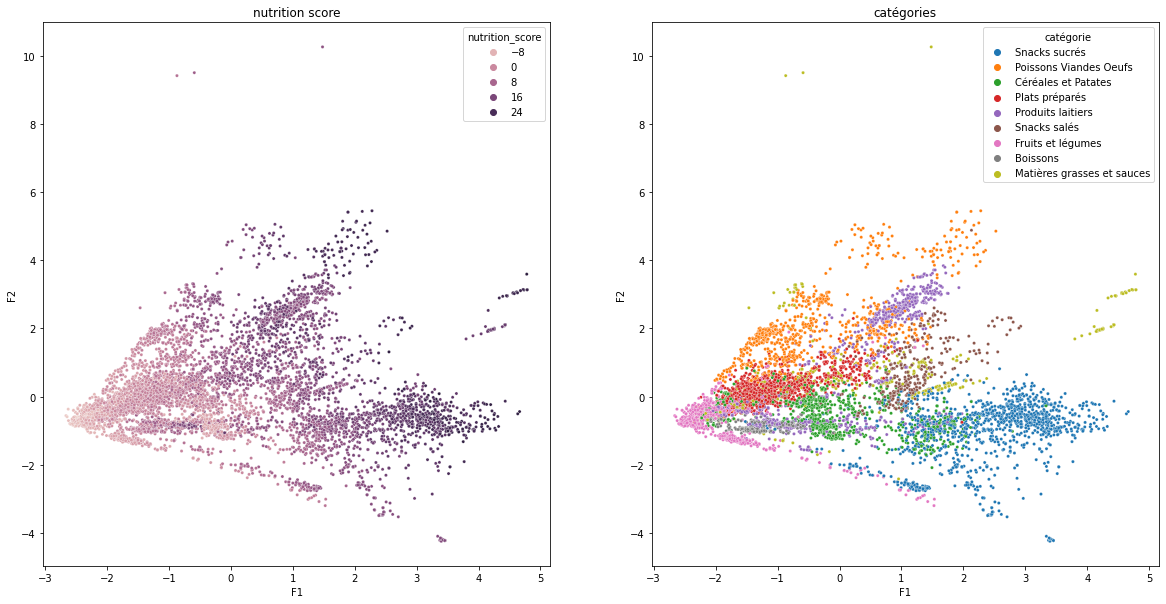

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.set_title("nutrition score")
sns.scatterplot(
    x="F1", y="F2", hue="nutrition_score", data=data_pca, ax=ax1, s=10
)
ax2.set_title("catégories")
sns.scatterplot(
    x="F1", y="F2", hue="catégorie", data=data_pca, ax=ax2, s=10
)
plt.show()

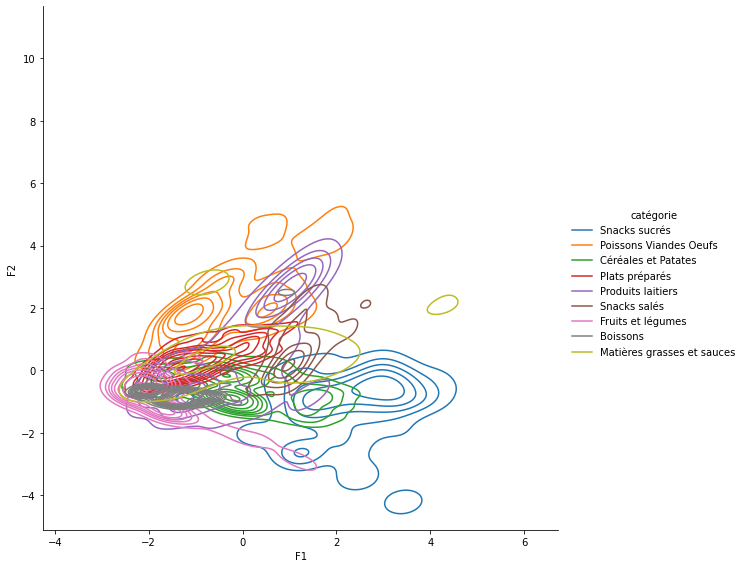

In [40]:
g = sns.pairplot(
    data_pca,
    x_vars=["F1"],
    y_vars=["F2"],
    hue="catégorie",
    kind='kde',
    height=8,
)
plt.show()